# Maps of important Flinn-Engdahl regions and Major Tectonic Plates

The notebook creates a map with the Flinn-Engdahl regions, which is the grouping system we have choosen to use for our earthquakes. These regions represent homogeneous tectonic areas, meaning that every earthquake event inside of each region is similar to the others in the region. We will only be labeling 20 of these regions, 10 will be those that contian the highest magitude earthquake events, and the other 10 the lowest magitude earthquake events.

The notebook also creates a map of all major tectonic plates. This includes their locations, boundaries, and names. Tectonic plates are regions of the earth's crust that are with out breaks and generally move as one mass. It is at their boards where earthquakes occur. 


### Now all necessary data must be loaded. 

In [1]:
#read in R script containing useful functions to get us going with the data
#more detailed descriptions for each function can be found inside the R script file
source('initialize_data.R', echo = FALSE)

In [2]:
load_libraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')
Checking rgeos availability: TRUE

Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map

Google's Terms of Ser

[1] "libraries loaded successfully"


In [3]:
#Explicit location of main project data
path <- "~/jupyter/cs2019_Group11/GroupProducts/data" 

#create df from main project data
df <- loadFiles(path) %>%
    reqCols %>%
    parseDt('time')

#create spatial point df
dfsp <- tospdf(df)

Files in "~/jupyter/cs2019_Group11/GroupProducts/data" loaded.
Subset Completed.
Parsed column: time.
spatial df created


In [4]:
#takes about 10 minutes to run
#adds Flinn-Engdahl regions to spatial point df and converts coordinate system
tpts <-regions_data(dfsp)

OGR data source with driver: LIBKML 
Source: "/dsa/home/jaw56m/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(tectonicdata):
“Z-dimension discarded”

[1] "No earthquakes in region:  25"
[1] "No earthquakes in region:  44"
[1] "No earthquakes in region:  76"
[1] "No earthquakes in region:  103"
[1] "No earthquakes in region:  112"
[1] "No earthquakes in region:  130"
[1] "No earthquakes in region:  132"
[1] "No earthquakes in region:  226"
[1] "No earthquakes in region:  325"
[1] "No earthquakes in region:  327"
[1] "No earthquakes in region:  367"
[1] "No earthquakes in region:  369"
[1] "No earthquakes in region:  370"
[1] "No earthquakes in region:  379"
[1] "No earthquakes in region:  381"
[1] "No earthquakes in region:  383"
[1] "No earthquakes in region:  417"
[1] "No earthquakes in region:  435"
[1] "No earthquakes in region:  436"
[1] "No earthquakes in region:  444"
[1] "No earthquakes in region:  448"
[1] "No earthquakes in region:  472"
[1] "No earthquakes in region:  481"
[1] "No earthquakes in region:  482"
[1] "No earthquakes in region:  491"
[1] "No earthquakes in region:  493"
[1] "No earthquakes in region:  497"
[1] 

In [5]:
base_world <- base_world_regions()
#get base map

OGR data source with driver: LIBKML 
Source: "/dsa/home/jaw56m/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(regiondata):
“Z-dimension discarded”Regions defined for each Polygons
Warning message:
“Ignoring unknown parameters: fill”

In [6]:
summary(tpts)

Object of class SpatialPointsDataFrame
Coordinates:
                min      max
coords.x1 -20037397 20037508
coords.x2  -9397814  9695037
Is projected: TRUE 
proj4string :
[+init=epsg:4087 +proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0
+datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0]
Number of points: 511837
Data attributes:
     depth             mag             time                    
 Min.   : -3.60   Min.   :2.500   Min.   :1999-01-01 01:02:39  
 1st Qu.: 10.00   1st Qu.:2.990   1st Qu.:2004-12-08 03:12:53  
 Median : 22.00   Median :4.000   Median :2008-12-20 11:33:42  
 Mean   : 54.59   Mean   :3.794   Mean   :2009-08-02 09:43:03  
 3rd Qu.: 50.00   3rd Qu.:4.500   3rd Qu.:2014-10-24 01:16:41  
 Max.   :735.80   Max.   :9.100   Max.   :2018-12-31 23:54:07  
      id               updated                      newname         
 Length:511837      Min.   :2013-02-06 02:29:15   Length:511837     
 Class :character   1st Qu.:2014-11-07 01:25:49   Class :character  
 

### Find Flinn-Engdahl regions of interest 

Flinn-Engdahl regions which correspond to the highest magitude earthquake events must be determined. STDevs and means for each region are calculated as well. 

In [7]:
DF <- as.data.frame(tpts)
#need to convert into df so can run function on it
 sum =  DF %>% 
        group_by(newname) %>% #this groups each of the Flinn-Engdahl Regions
        summarize(max_mag = max(mag), std_mag = sd(mag), mean_mag = mean(mag)) %>% #calc some bacis stats per group
        arrange(desc(max_mag)) #find the top 10 Flinn-Engdahl Regions based on the mag 


head(sum, 10)
#list them out

#they are the highest mag events 

newname,max_mag,std_mag,mean_mag
197,9.1,0.4679133,4.547196
570,9.1,0.4317916,4.534124
54,8.8,0.7583411,3.788553
593,8.6,0.4293072,4.545539
191,8.4,0.4702360,4.637022
65,8.4,0.5142897,4.536136
171,8.3,0.4418633,4.529012
553,8.3,0.6915355,4.378481
669,8.3,0.5030004,4.433428
60,8.2,0.3942486,4.291990


Flinn-Engdahl regions which correspond to the lowest magitude earthquake events must be determined. STDevs and means for each region are calculated as well. 

In [8]:
DF <- as.data.frame(tpts)
#need to convert into df so can run function on it
 sum =  DF %>% 
        group_by(newname) %>% #this groups each of the Flinn-Engdahl Regions
        summarize(max_mag = max(mag), std_mag = sd(mag), mean_mag = mean(mag)) %>% #calc some bacis stats per group
        arrange(max_mag) #find the bottom 10 Flinn-Engdahl Regions based on the mag 


head(sum, 10)
#list them out

#they are the lowest mag events 

#note the nans are because these are the only earthquake in the region

newname,max_mag,std_mag,mean_mag
518,2.60,0.07071068,2.550000
597,2.60,0.07071068,2.550000
430,2.70,0.11547005,2.600000
478,2.80,NA,2.800000
400,2.90,NA,2.900000
622,2.90,NA,2.900000
425,2.95,0.24748737,2.775000
740,2.98,NA,2.980000
384,3.00,0.20000000,2.800000
387,3.00,0.18348479,2.683333


An id column must be added to the dataset that contians the information about the locations of each region, inorder to allow for subseting later by region.

In [7]:
tectonicdata = "fe.kmz"
tectonicFeatures <- readOGR(tectonicdata)

tectonicFeatures@data$ID <- seq.int(nrow(tectonicFeatures))#this adds in an id which is the same 
#as the newname in the tpts to match regions with earthquakes

summary(tectonicFeatures)

OGR data source with driver: LIBKML 
Source: "/dsa/home/jaw56m/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(tectonicdata):
“Z-dimension discarded”

Object of class SpatialPolygonsDataFrame
Coordinates:
   min max
x -180 180
y  -90  90
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
     Name           description         timestamp            begin          
 Length:754         Length:754         Length:754         Length:754        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     end            altitudeMode         tessellate    extrude    visibility
 Length:754         Length:754         Min.   :-1   Min.   :0   Min.   :-1  
 Class :character   Class

Only regions that correspond to the highest and lowest magitude events are wanted, so they are subset out.

In [10]:
map_points_high <- subset(tectonicFeatures, (ID == '197' | ID == '570' | ID == '54' | ID == '593' | ID == '65' | ID == '191' | ID == '171' | ID == '553' | ID == '669' | ID == '60')) 
map_points_low <- subset(tectonicFeatures, (ID == '518' | ID == '597' | ID == '430' | ID == '478' | ID == '400' | ID == '622' | ID == '425' | ID == '740' | ID == '384' | ID == '387'))


### Find geographical centers of Flinn-Engdahl regions for labels


Below geographical centers of each region are determined, this is where label will be placed, this is done for both the high and low magitude subsets.

In [41]:
PolyCentroids <- gCentroid(map_points_high, byid=TRUE)
#here again I am finding the center of each region. I am hoping that this will not have the overlap as before

PolyCentroids$ID <- seq.int(length(PolyCentroids))#add id for labels

places_high = as.data.frame(PolyCentroids) #convert for ggplot

places_high$name = c(54, 60, 65, 171, 191, 197, 553, 570, 593, 669)
places_high

,ID,x,y,name
54,1,-72.36667,-34.633334,54
60,2,-93.16667,14.833333,60
65,3,-75.06250,-14.562500,65
171,4,151.80556,47.250000,171
191,5,102.90000,-2.625000,191
197,6,141.50000,37.590909,197
553,7,148.35047,54.322430,553
570,8,93.27419,2.919355,570
593,9,98.75714,2.985714,593
669,10,142.93333,43.300000,669


In [60]:
PolyCentroids <- gCentroid(map_points_low, byid=TRUE)
#here again I am finding the center of each region. I am hoping that this will not have the overlap as before

PolyCentroids$ID <- seq.int(length(PolyCentroids))#add id for labels

places_low = as.data.frame(PolyCentroids) #convert for ggplot
places_low$name = c(384, 387, 400, 425, 430, 478, 518, 597, 622, 740)
places_low

,ID,x,y,name
384,1,-94.50000,38.50000,384
387,2,-89.50000,37.50000,387
400,3,-89.81579,44.44737,400
425,4,-74.50000,40.00000,425
430,5,-94.50000,35.00000,430
478,6,139.21429,-14.00000,478
518,7,-150.50000,-23.00000,518
597,8,29.66667,64.33333,597
622,9,30.50000,69.50000,622
740,10,-68.21429,42.92857,740


### Now that the lcoations for the labels are known, they will be plotted.

High magitude event labels...

In [56]:
#setting plot size a little larger to help see 754 regions
options(repr.plot.width=44, repr.plot.height=40)
base_world_2 = base_world + geom_polygon(data = map_points_high, 
          aes(x = long, y = lat, group = group),
          color = 'black', fill = 'indianred1', size = .5)
base_world_3 = base_world_2 + geom_text(data = places_high, aes(x = x, y = y, label = name), size = 8, fontface = 'bold', color = "black") + theme_void()
#I add the labels for the regions


Regions defined for each Polygons


Low magitude event labels....

In [58]:
base_world_4 = base_world_3 + geom_polygon(data = map_points_low, 
          aes(x = long, y = lat, group = group),
          color = 'black', fill = 'cadetblue1', size = .5)+
theme(legend.text=element_text(size=26), legend.title=element_text(size=40))



Regions defined for each Polygons


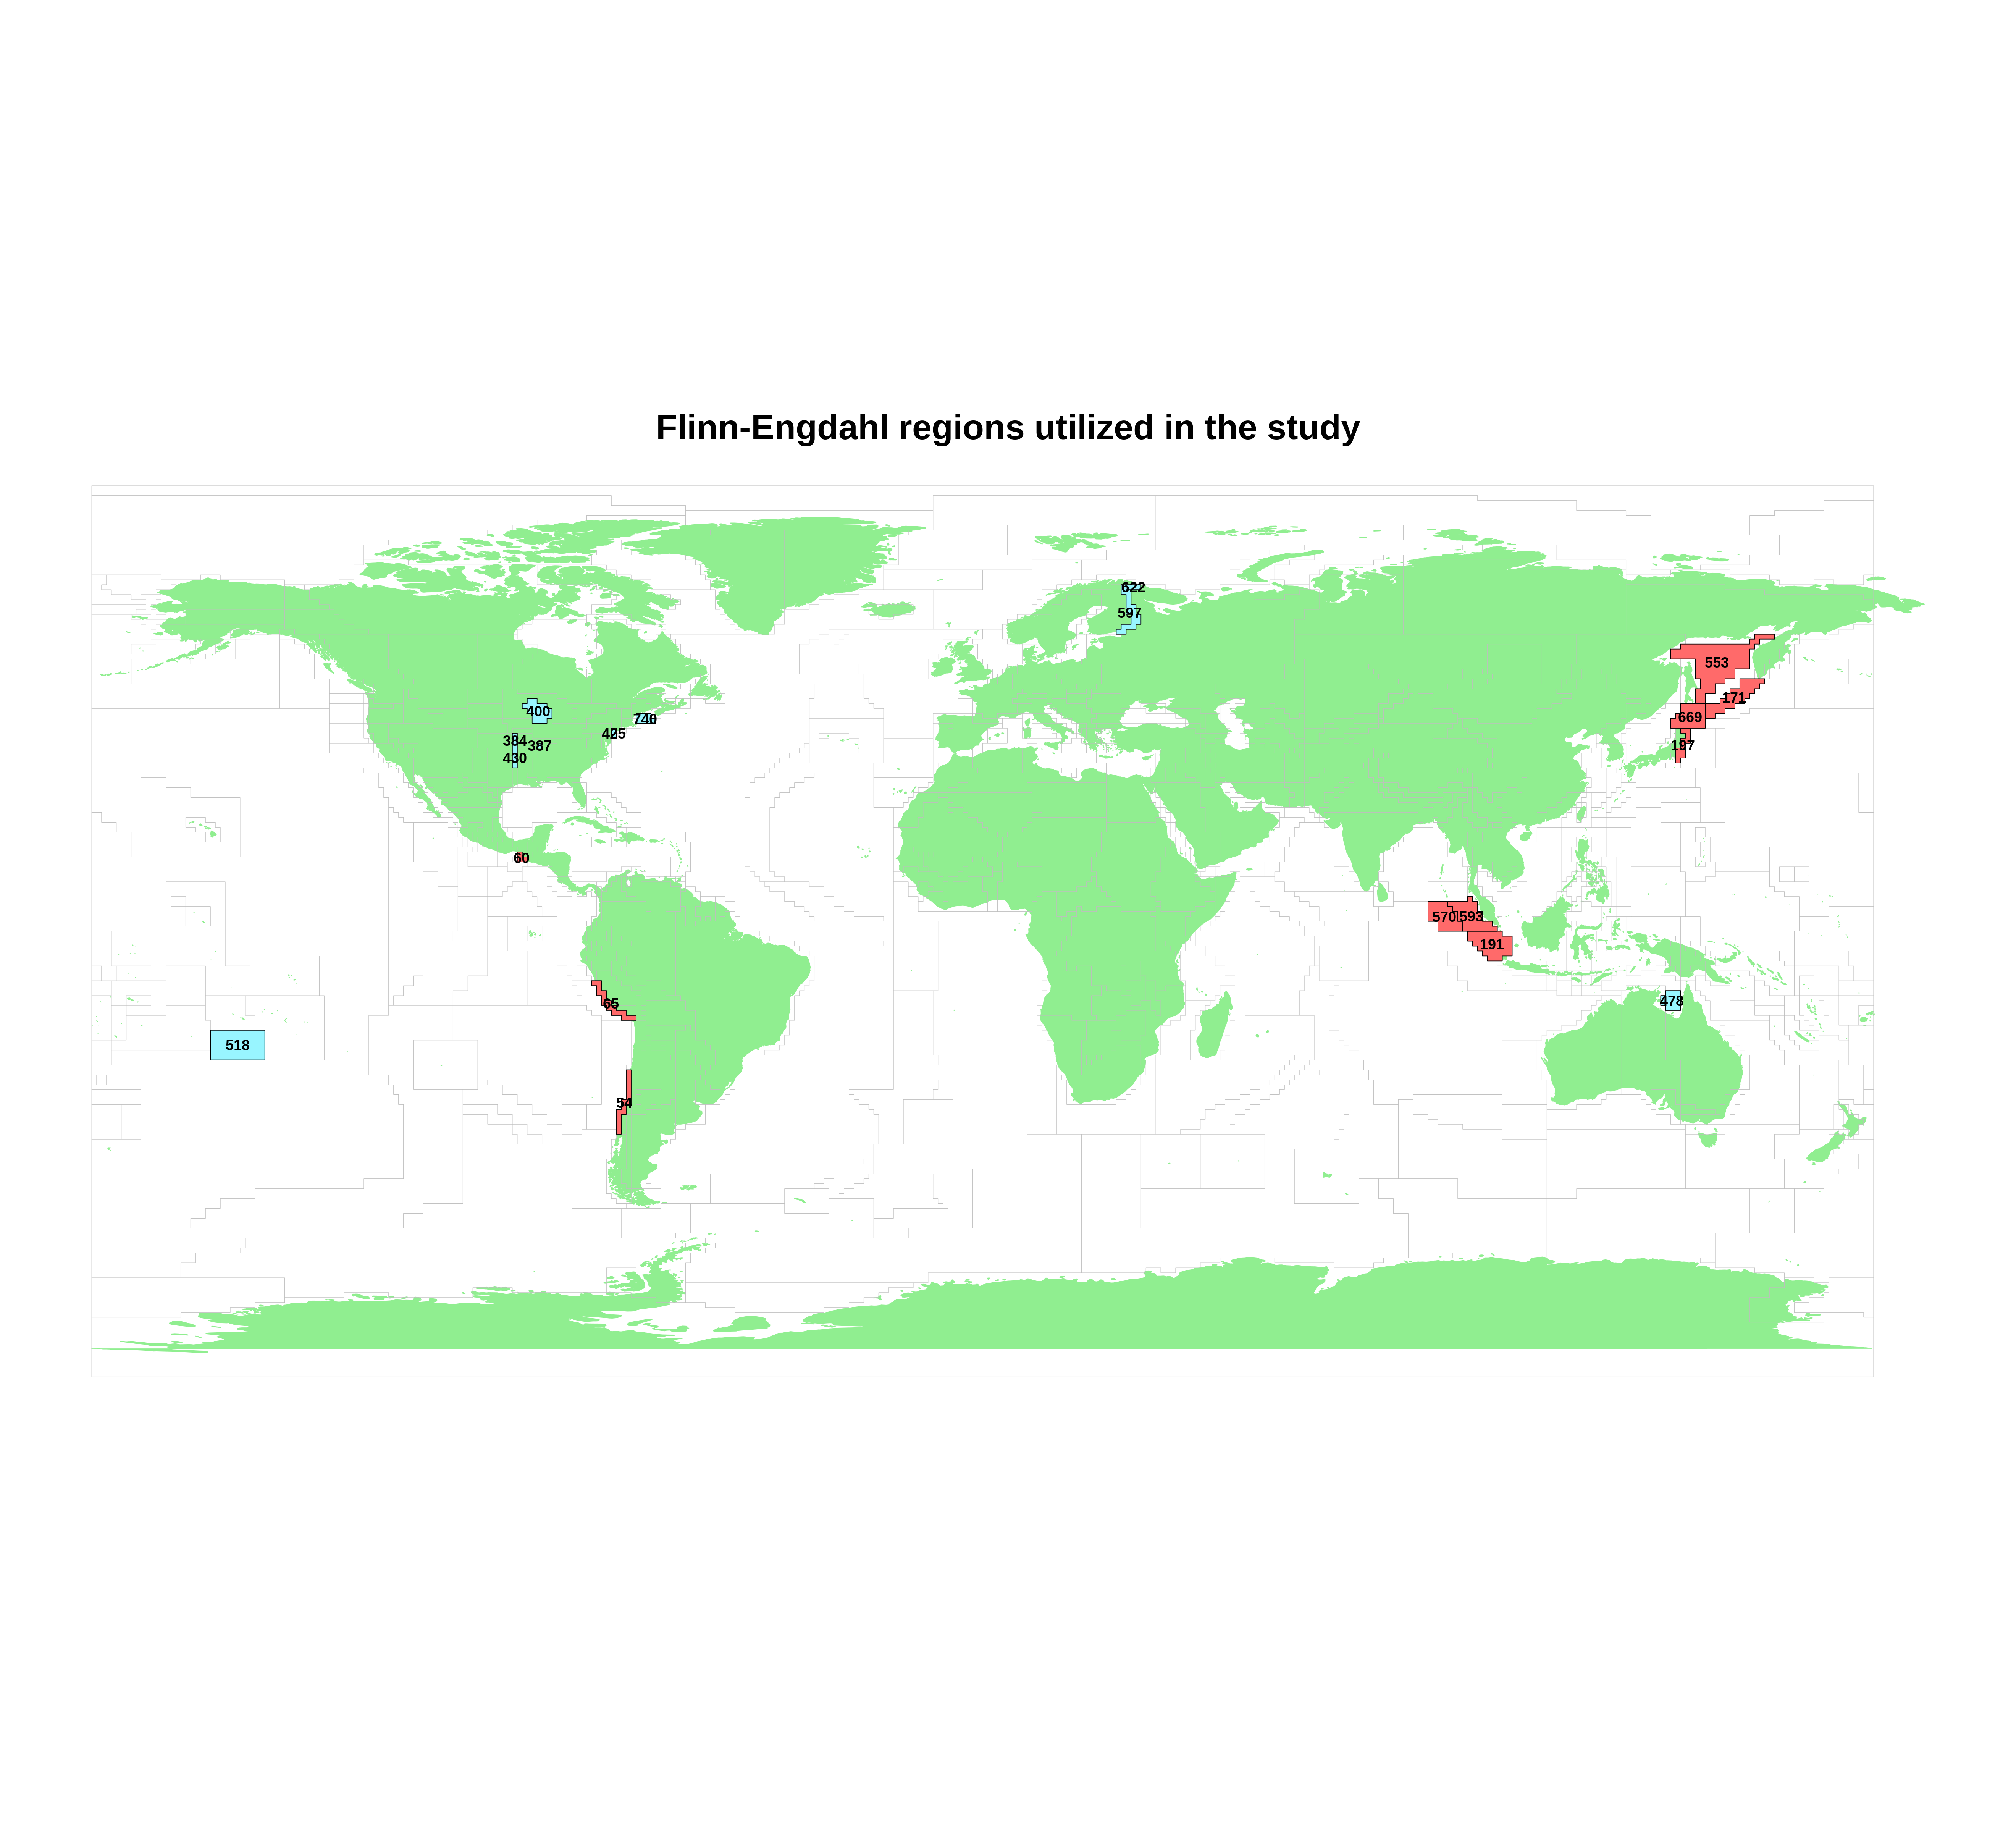

In [59]:
base_world_4 +geom_text(data = places_low, aes(x = x, y = y, label = name), size = 8, color = "black", fontface = 'bold') + theme_void()+
ggtitle("Flinn-Engdahl regions utilized in the study") +
# I give a proper title

theme(plot.title = element_text(hjust = 0.5, size = 55, face = "bold"))
# I make the title larger and adjust it to make it more visible 



Above is a plot of the Flinn-Engdahl regions. The region which were choosen to be labeled and are colored in red correspond to those that contian the top 10 highest magitude earthquakes in our study. Those that are colored blue contain the 10 lowest magitude earthquakes in our study. These are highlighted because these are the regions which we choose to subset for much of the study. Due to the large computational power required for our dataset we chose data that represents the two extreme, since we can not perform ever task on the entire set.  

### Now the map of the tectonic plates will be created

First, a dataframe must be created which will hold all the names and locations for every plate.

In [249]:
names = c('North American Plate', 'South American Plate', 'Eurasian Plate', 'Pacific Plate', 
          'African Plate', 'Australian Plate', 'Antartic Plate', 'Nazca Plate', 'Arabian Plate', 
          'Pacific Plate', 'Phillippine Sea Plate', 'Caribbean Plate', 'Cocos Plate', 'Scotia Plates',
          'Juan de Fuca Plate', 'Indian Plate') #names
xloc = c(-95.00, -60.00, 80.00, 165.00, 10.00, 135.00, 0.00, -95.00, 50.00, -150.00, 134.00, -70.00, -94.00,
         -50.00, -145.00, 75.00) # x locations
yloc = c(40.00, -10.00, 45.00, 15.00, 5.00, -25.00, -65.00, -15.00, 20.00, 0.00, 18.00, 15.00, 8.00, -57.00, 
         50.00, 20.00) # y locations 

df = as.data.frame(cbind(names,xloc,yloc)) # make into df

df$xloc = as.numeric(df$xloc)
df$yloc = as.numeric(df$yloc) # both must be made numeric for plotting

Now the plate names can be plotted onto a plot which has the tectonic plate location from USGS drawn.

Warning message:
“Ignoring unknown parameters: fill”

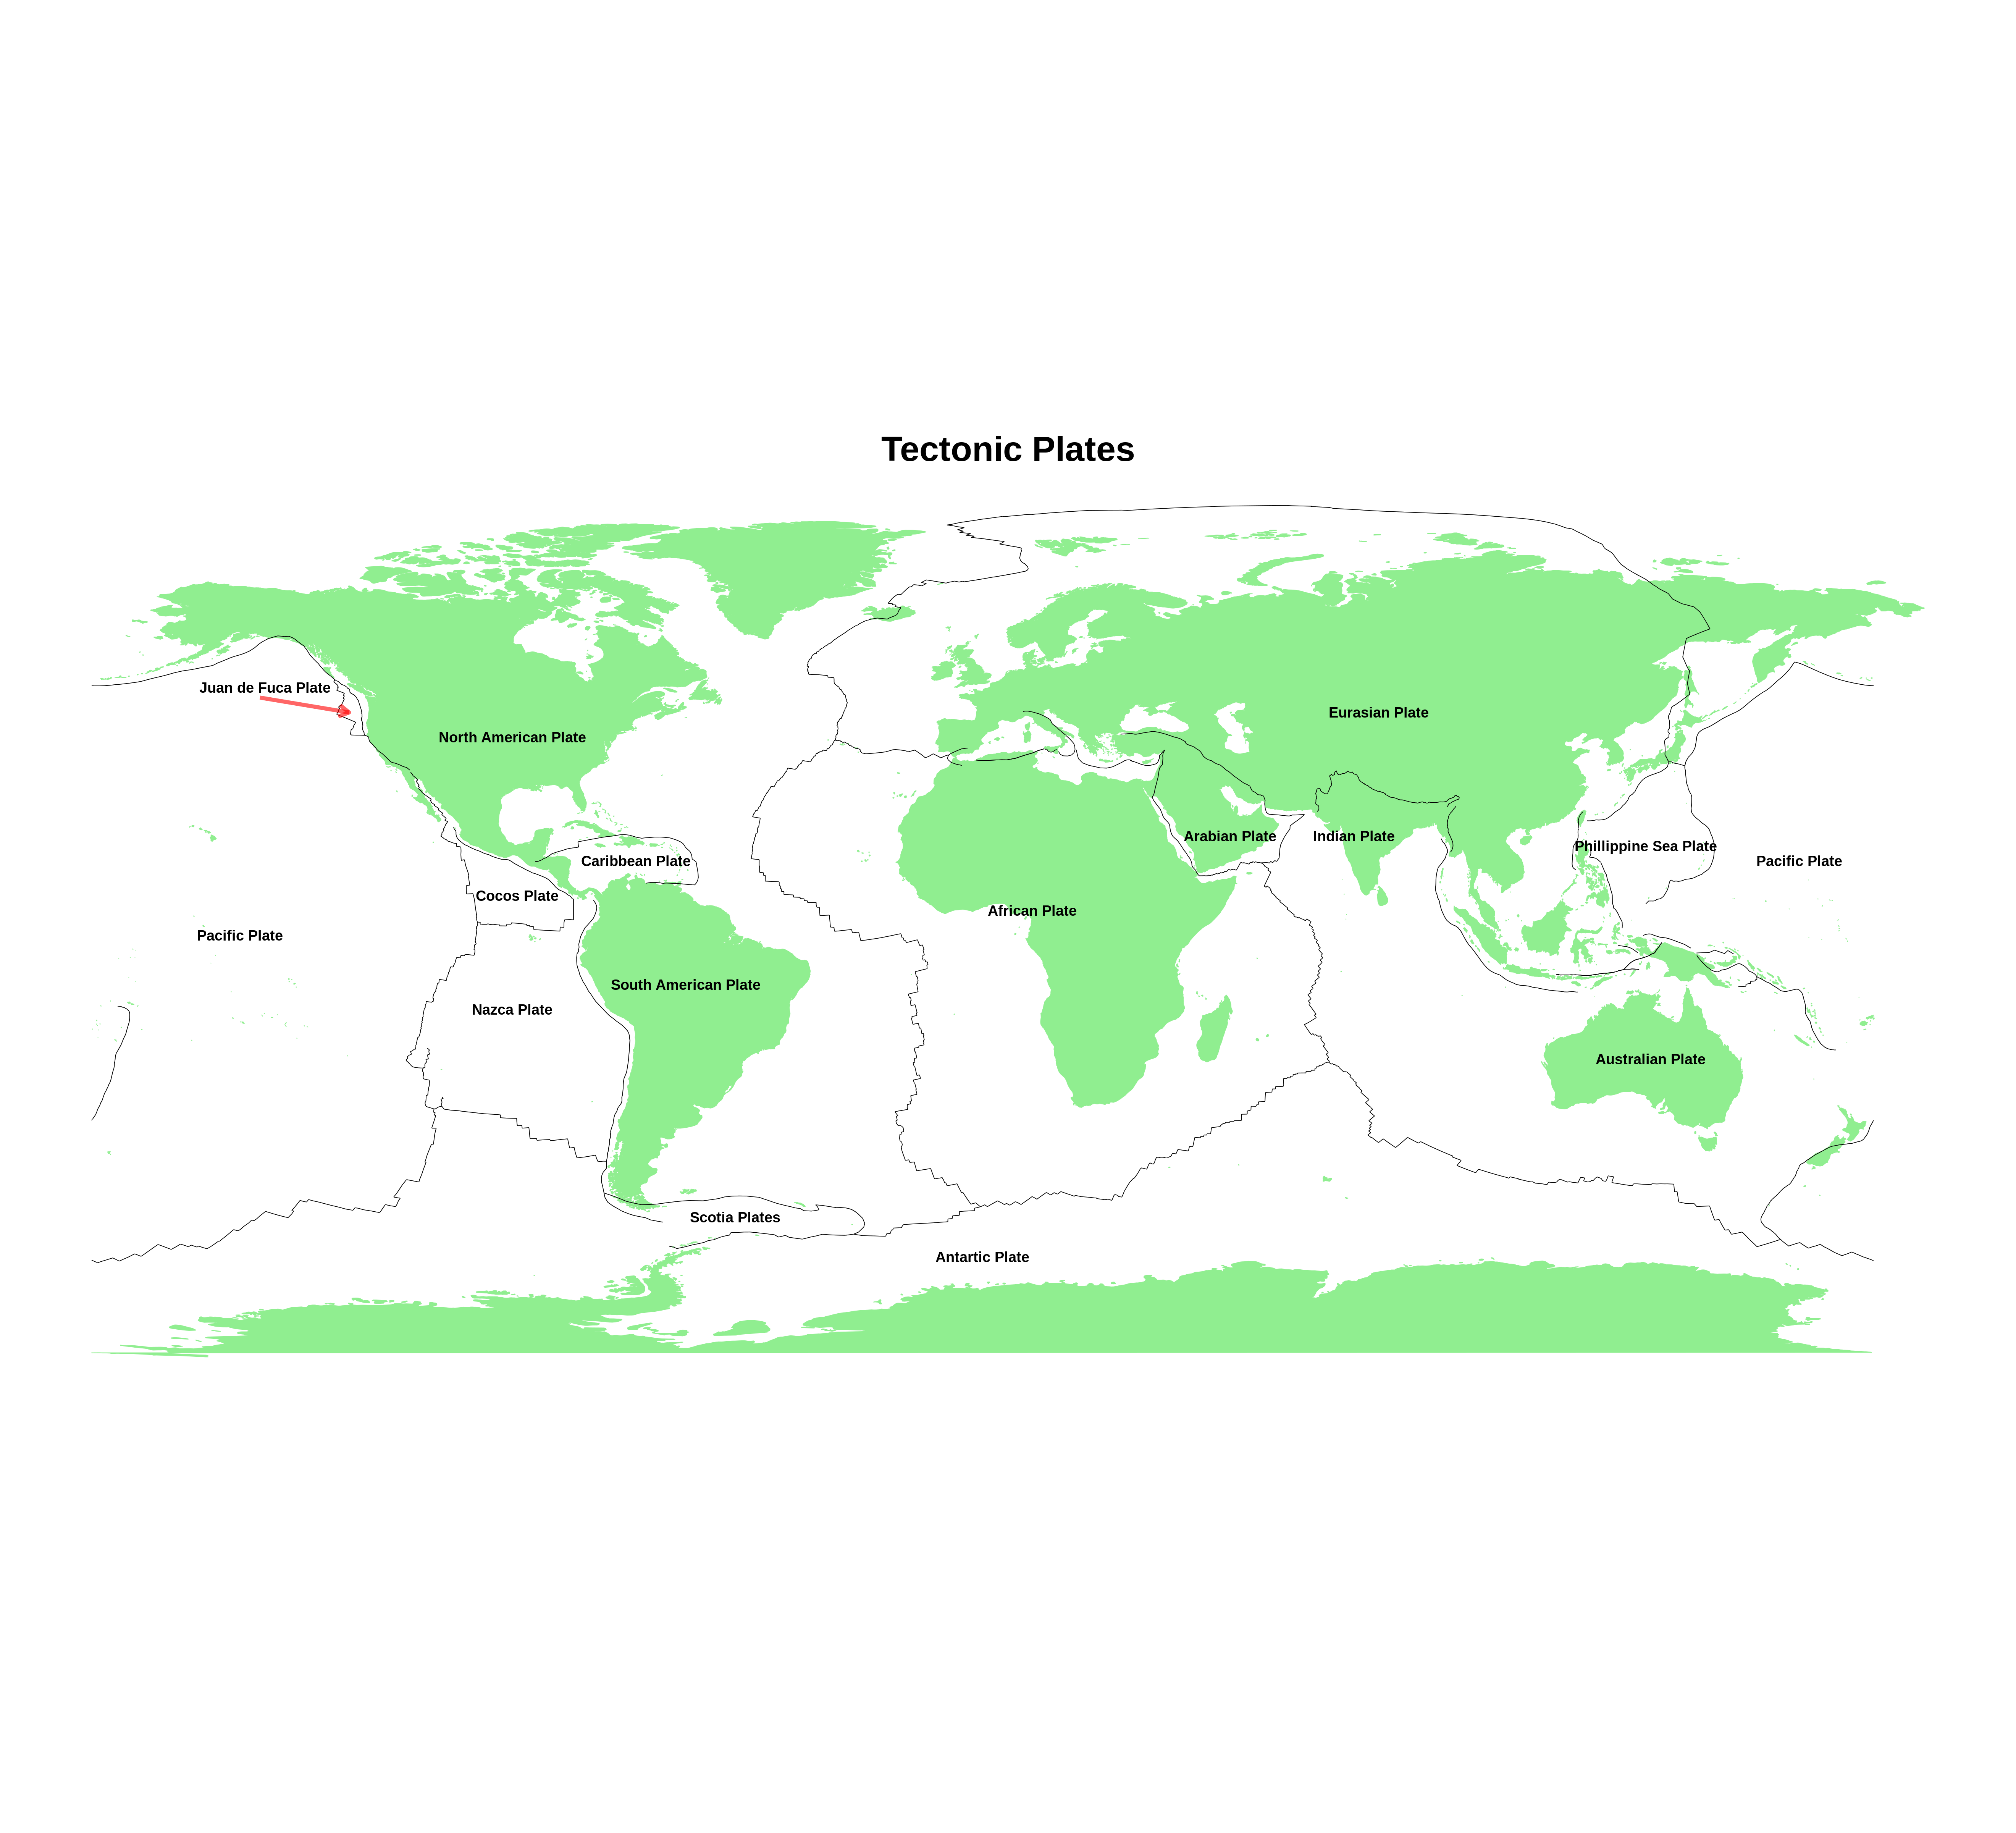

In [251]:
options(repr.plot.width=44, repr.plot.height=40)

base_world + geom_path(data = tectonicFeatures, 
          aes(x = long, y = lat, group = group),
          color = 'black', fill = 'white', size = .5)+ #add the plates 
geom_text(data = df, aes(x = xloc, y = yloc, label = names), size = 8, color = "black", fontface = 'bold') + #add the text
# Add arrow 
annotate("segment", x = -146, xend = -128, y = 48, yend = 45, colour = "red", size=3, alpha=0.6, arrow=arrow())+
theme_void()+
ggtitle("Tectonic Plates") +
# I give a proper title

theme(plot.title = element_text(hjust = 0.5, size = 55, face = "bold"))

    ##This now becomes a base map for any further mapping 


The above plot is the completed product and is ready for use.

### Now the map of the number of earthquakes per a Flinn-Engdahl region

Creating a map which will plot out every Flinn-Engdahl region and color them in ranges of red (high number of earthquakes) to green (low number of earthquakes). 

Need to install the cartography package inorder to make a choropleth map.

In [16]:
install.packages('cartography')
library(cartography)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Since written originally in another notebook, will load the data used in that notebook. 

In [17]:
df = read.csv("data.csv",header=TRUE,sep=",")

head(df) # here the data created from the bvalue_model notebook will be loaded in order to save computational time


X,newname,depth,mag,time,id,updated,latitude,longitude,bvalue,error,time_lag
1,10,33.0,5.1,1999-02-14 17:17:27,usp00092tz,2014-11-07 01:07:01,21.581,-106.681,0.6204207,0.66570086,NA
2,10,33.0,4.5,1999-03-16 06:14:07,usp00094kr,2014-11-07 01:07:14,22.002,-107.375,0.6204207,0.66570086,1999-02-14 17:17:27
3,10,10.0,4.5,1999-01-13 07:38:50,usp0009114,2014-11-07 01:06:48,22.690,-107.988,0.6204207,0.66570086,1999-03-16 06:14:07
4,10,10.0,5.3,1999-03-12 07:07:40,usp00094by,2016-11-09 22:04:11,22.219,-107.368,0.6204207,0.66570086,1999-01-13 07:38:50
5,10,33.0,5.2,1999-01-10 20:36:06,usp00090x3,2016-11-09 21:38:36,22.939,-108.020,0.6204207,0.66570086,1999-03-12 07:07:40
6,100,129.1,4.3,1999-04-15 14:05:21,usp00096bk,2014-11-07 01:07:28,-19.295,-69.268,0.3347563,0.04778564,NA


In [18]:
tectonicdata = "fe.kmz"
tectonicFeatures <- readOGR(tectonicdata)

#add the Flinn-Engdahl regions and transform for plotting
transTectonicFeatures <- spTransform(tectonicFeatures,  CRS("+init=epsg:4087"))


OGR data source with driver: LIBKML 
Source: "/dsa/home/jaw56m/jupyter/cs2019_Group11/GroupProducts/fe.kmz", layer: "fe"
with 754 features
It has 12 fields


Warning message in readOGR(tectonicdata):
“Z-dimension discarded”

Run loop that counts the number of earthquakes per a Flinn-Engdahl region and then stores them for later. 

In [19]:
count = " "
regions = " "
for (i in 1:754) {  # i need this to run for every region 
    item = match(i,df$newname)
    if (is.na(item)){ #if there are no matches then there are no earthquakes
         count[i] = 0}
 else {
        regions = subset(df, newname == i)
        count[i] = length(regions) #give the length of the region number of earthquakes
    }
    }
num = " "
for (i in 1:754){
    if (count[i] != 0){ #add the number of earthquakes if not zero
    regions = subset(df, newname == i)
    num[i] = nrow(regions)}
     else {num[i] = 0}  # put zero if no earthquakes 
}

Add a value to the Flinn-Engdahl regions that contians the number of earthquakes each has. 

In [20]:
transTectonicFeatures@data$count <- as.numeric(num)#this adds in an id which is the same 


Plot the number of earthquakes using choroLayer function. 

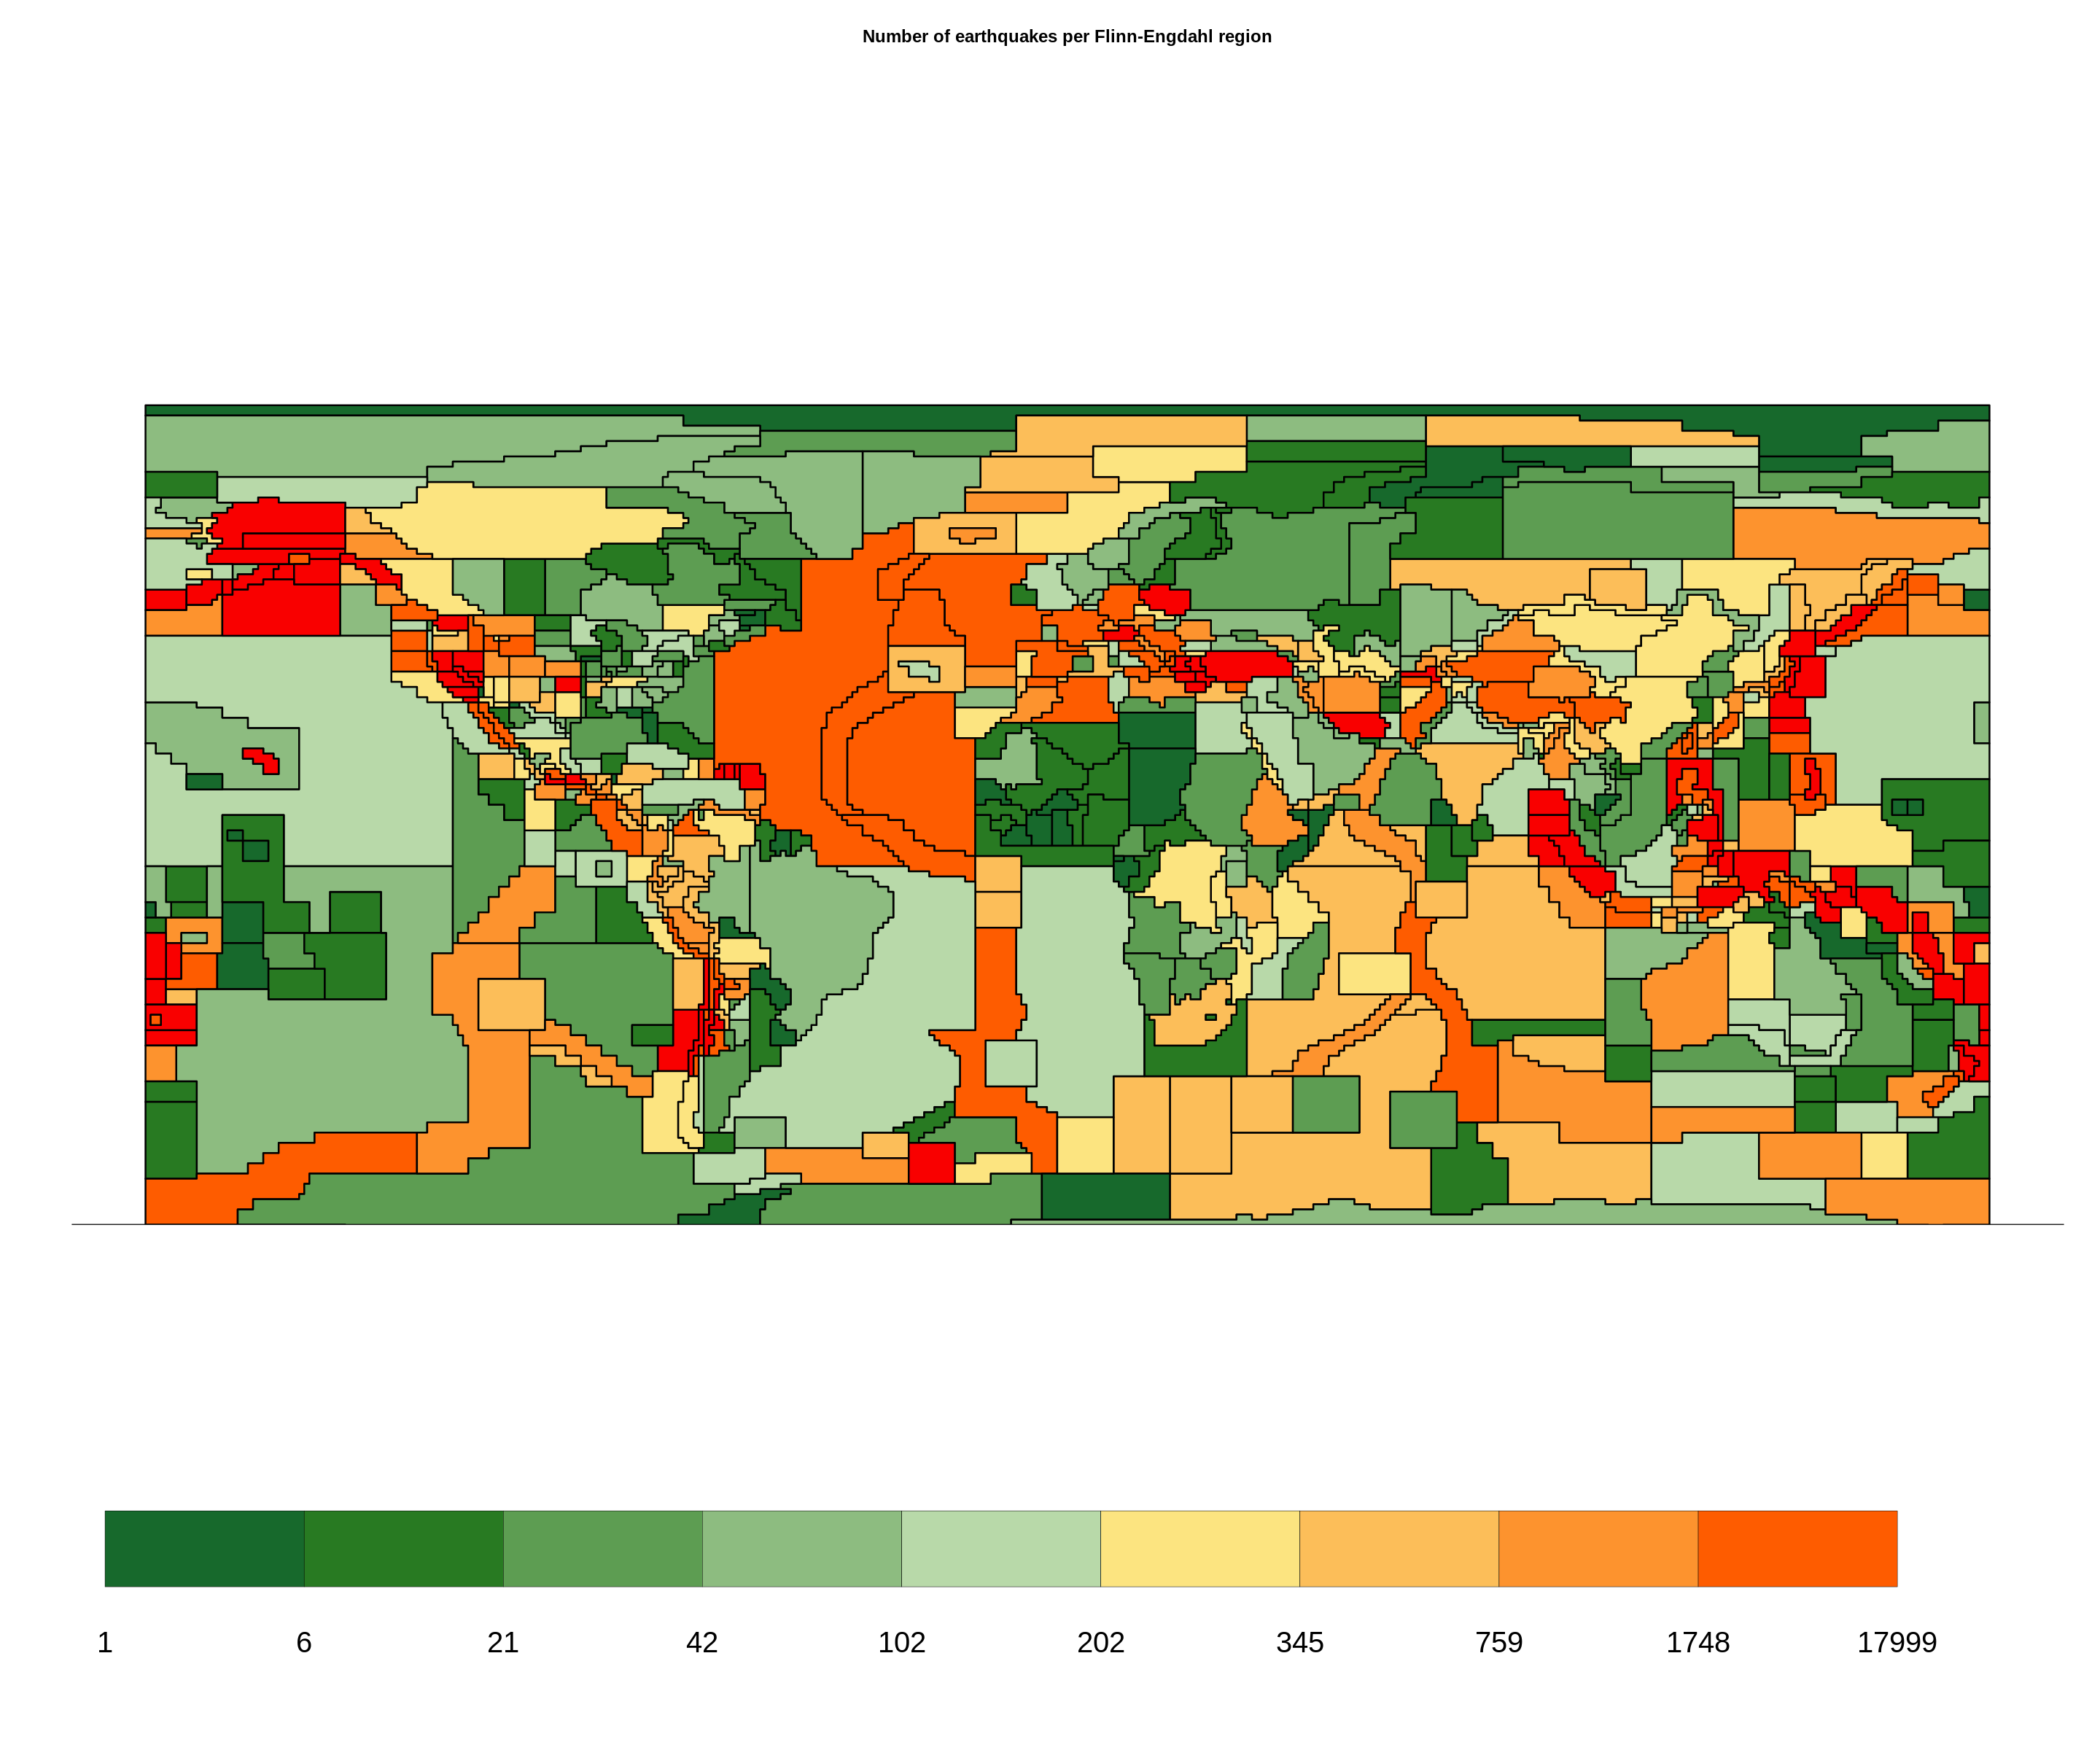

In [21]:
options(repr.plot.width=24, repr.plot.height=20)
#change plot size

cols = c(rev(carto.pal("green.pal", 5)), carto.pal("orange.pal", 5))
#set the colors

choroLayer(spdf = transTectonicFeatures, df = transTectonicFeatures@data, var = "count",
          border = "black", col = cols, legend.pos = "n", lwd = 2)
#creates and adds choropleth map 
legendChoro(pos = "bottom", breaks = c(1,6,21,42,102,202,345,759,1748,17999), col = cols,
            title.txt = " ", title.cex = 1.5,  values.cex = 2,
            cex = 2, frame = TRUE,  horiz = TRUE, nodata = FALSE) 
#makes the plots legend

title("Number of earthquakes per Flinn-Engdahl region")



The above map is each Flinn-Engdahl region and the color indicates the number of earthquakes per a region. 